In [1]:
!pip install path
!pip install memory_profiler

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
%matplotlib inline
from memory_profiler import memory_usage
import os
import pandas as pd
from glob import glob
import numpy as np

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import gc
from path import Path


In [4]:
os.mkdir('train')
os.mkdir('test')

In [5]:
glob('./train/*')

[]

In [6]:
def create_spectrogram(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    file_name  = r'C:\Users\mulkr\Desktop\python\Poject 2 - AI\train\\' + name + '.jpg'                       
    plt.savefig(file_name, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del file_name,name,clip,sample_rate,fig,ax,S

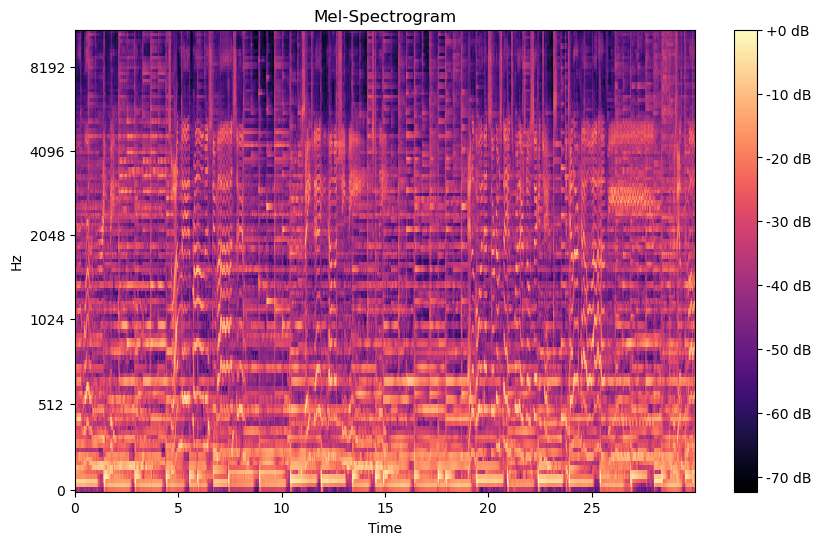

In [7]:
# Mel-Spectrogram Image 
audio_file = r'C:\Users\mulkr\Desktop\python\Poject 2 - AI\genres\country\country.00003.au' 
y, sr = librosa.load(audio_file)

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')

plt.savefig('mel_spectrogram.png')
plt.show()

In [8]:
folders =[
"C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical",
"C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/country",
"C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/disco",
"C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/hiphop",
"C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/jazz",
"C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/metal",
"C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/pop",
"C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/reggae",
"C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/rock"
]

file_list = []

for folder in folders:
    
    file_list.extend(glob(f"{folder}/*"))
    # Normalize all paths to use forward slashes
    file_list = [file.replace("\\", "/") for file in file_list]
    print(file_list)
  

['C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/classical.00000.au', 'C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/classical.00001.au', 'C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/classical.00002.au', 'C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/classical.00003.au', 'C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/classical.00004.au', 'C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/classical.00005.au', 'C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/classical.00006.au', 'C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/classical.00007.au', 'C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/classical.00008.au', 'C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/classical.00009.au', 'C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/classical.00010.au', 'C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/classical.00011.au', 'C:

In [9]:
for i,file in enumerate(file_list):
    
    filename,name = file,file.split('/')[-1].split('.')[0] + '.' + file.split('/')[-1].split('.')[1]
    print(filename) 
    print(name)
    create_spectrogram(filename,name)
    # Properly print the index of the file being processed
    print(f'Spectrogram created for audio file number: {i + 1}')
    # Print the file path where the spectrogram is saved (check if it’s being saved correctly)
    file_name1 = r'C:\Users\mulkr\Desktop\python\Poject 2 - AI\train\\' + name + '.jpg'
    print(f"Spectrogram saved as: {file_name1}")

C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/classical.00000.au
classical.00000
Spectrogram created for audio file number: 1
Spectrogram saved as: C:\Users\mulkr\Desktop\python\Poject 2 - AI\train\\classical.00000.jpg
C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/classical.00001.au
classical.00001
Spectrogram created for audio file number: 2
Spectrogram saved as: C:\Users\mulkr\Desktop\python\Poject 2 - AI\train\\classical.00001.jpg
C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/classical.00002.au
classical.00002
Spectrogram created for audio file number: 3
Spectrogram saved as: C:\Users\mulkr\Desktop\python\Poject 2 - AI\train\\classical.00002.jpg
C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/classical.00003.au
classical.00003
Spectrogram created for audio file number: 4
Spectrogram saved as: C:\Users\mulkr\Desktop\python\Poject 2 - AI\train\\classical.00003.jpg
C:/Users/mulkr/Desktop/python/Poject 2 - AI/genres/classical/cla

In [10]:
data = []  # Initialize an empty list to hold dictionaries

# Loop through the file_list and append each file with the class (folder name)
for file in file_list:
    file_name = file.split('/')[-1]  # Extract the file name (with extension)
    class_ = os.path.basename(os.path.dirname(file))  # Folder name is treated as the genre name
    
    # Append a dictionary of filename and genre name to the data list
    data.append({"file_name": file_name, "class": class_})

# After the loop, create the DataFrame
labels = pd.DataFrame(data)

# Display the DataFrame
labels.tail(50)

,file_name,class
850,rock.00050.au,rock
851,rock.00051.au,rock
852,rock.00052.au,rock
853,rock.00053.au,rock
854,rock.00054.au,rock
855,rock.00055.au,rock
856,rock.00056.au,rock
857,rock.00057.au,rock
858,rock.00058.au,rock
859,rock.00059.au,rock


In [11]:
labels.to_csv("Labels.csv", index=False)

In [12]:
labels['class'].value_counts()

class
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

In [13]:
classes=list(labels['class'].value_counts().index)

In [14]:
for cl in classes:
  os.mkdir(r'C:\Users\mulkr\Desktop\python\Poject 2 - AI\train\\'+cl)

In [15]:
class_dict_map={x:r'C:\Users\mulkr\Desktop\python\Poject 2 - AI\train\\'+x+'\\' for x in classes}

In [16]:
class_dict_map

{'classical': 'C:\\Users\\mulkr\\Desktop\\python\\Poject 2 - AI\\train\\\\classical\\',
 'country': 'C:\\Users\\mulkr\\Desktop\\python\\Poject 2 - AI\\train\\\\country\\',
 'disco': 'C:\\Users\\mulkr\\Desktop\\python\\Poject 2 - AI\\train\\\\disco\\',
 'hiphop': 'C:\\Users\\mulkr\\Desktop\\python\\Poject 2 - AI\\train\\\\hiphop\\',
 'jazz': 'C:\\Users\\mulkr\\Desktop\\python\\Poject 2 - AI\\train\\\\jazz\\',
 'metal': 'C:\\Users\\mulkr\\Desktop\\python\\Poject 2 - AI\\train\\\\metal\\',
 'pop': 'C:\\Users\\mulkr\\Desktop\\python\\Poject 2 - AI\\train\\\\pop\\',
 'reggae': 'C:\\Users\\mulkr\\Desktop\\python\\Poject 2 - AI\\train\\\\reggae\\',
 'rock': 'C:\\Users\\mulkr\\Desktop\\python\\Poject 2 - AI\\train\\\\rock\\'}

In [17]:
import shutil

In [18]:
def return_class(file_name):
  cl = labels.loc[labels['file_name'] == file_name, 'class']
  return(cl.values[0])   

In [19]:
path = 'C:\\Users\\mulkr\\Desktop\\python\\Poject 2 - AI\\train\\'
for file in labels['file_name']:
  name=file.split('.')[0]+'.'+file.split('.')[1]+'.jpg'
  shutil.move( path + name ,
              class_dict_map[return_class(file)]+name)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
WIDTH = 64
HEIGHT = 64
BATCH_SIZE = 32
TRAIN_DIR=r'C:\Users\mulkr\Desktop\python\Poject 2 - AI\train\\'

# data prep
train_datagen = ImageDataGenerator(
    rescale=1./255.,validation_split=0.25)


train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical')
    


Found 900 images belonging to 9 classes.


In [22]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras import regularizers, optimizers


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))
model.compile(optimizers.RMSprop(learning_rate=0.0005, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

C:\Users\mulkr\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\mulkr\AppData\Roaming\Python\Python311\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,679,113 (10.22 MB)

 Trainable params: 2,679,113 (10.22 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

model.fit(train_generator,
          steps_per_epoch=STEP_SIZE_TRAIN,
          epochs=150
)

C:\Users\mulkr\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 283ms/step - accuracy: 0.1224 - loss: 2.2228
Epoch 2/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.2188 - loss: 2.1833
Epoch 3/150
 1/28 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.0312 - loss: 2.1862

C:\Users\mulkr\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.1648 - loss: 2.1559
Epoch 4/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.2500 - loss: 2.0948  
Epoch 5/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.2263 - loss: 1.9933
Epoch 6/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.2188 - loss: 2.0241
Epoch 7/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.2926 - loss: 1.9367
Epoch 8/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.0000e+00 - loss: 2.2908
Epoch 9/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.2674 - loss: 1.9017
Epoch 10/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 74us/step - accuracy: 0.2500 - loss: 1.8629
Epoch 11/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.3064 - loss: 1.8178
Epoch 12/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.2812 - loss: 1.8120  
Epoch 13/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.3291 - loss: 1.8254
Epoch 14/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - ac

In [ ]:
#GenreIdentification

In [26]:
from tensorflow.keras.preprocessing import image

In [27]:
img=image.load_img( r"C:\Users\mulkr\Desktop\python\Poject 2 - AI\train\country\country.00015.jpg",target_size=(HEIGHT, WIDTH))

In [28]:
x=image.img_to_array(img)

In [29]:
x=np.expand_dims(x, axis=0)

In [31]:
pred=model.predict(x)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


In [37]:
pred.argmax()

1

In [35]:
train_generator.class_indices

{'classical': 0,
 'country': 1,
 'disco': 2,
 'hiphop': 3,
 'jazz': 4,
 'metal': 5,
 'pop': 6,
 'reggae': 7,
 'rock': 8}

In [39]:
#Saving and loading the model
model.save('MusicGenreIden.h5')  
model.save(r'C:\Users\mulkr\Desktop\python\Poject 2 - AI\MusicGenreIden.h5')  
model = load_model('MusicGenreIden.h5')  